In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn import metrics

In [2]:
car_data = pd.read_csv("car data.csv")
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
car_data.shape

(301, 9)

In [4]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
car_data.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [6]:
print( car_data.Fuel_Type.value_counts() )
print( car_data.Seller_Type.value_counts() )
print( car_data.Transmission.value_counts() )

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64
Dealer        195
Individual    106
Name: Seller_Type, dtype: int64
Manual       261
Automatic     40
Name: Transmission, dtype: int64


# Encoding the Categorical Data

In [7]:
car_data.replace( { "Fuel_Type": { "Petrol": 0, "Diesel": 1, "CNG": 2 } }, inplace = True )

car_data.replace( { "Seller_Type": { "Dealer": 0, "Individual": 1 } }, inplace = True )

car_data.replace( { "Transmission": { "Manual": 0, "Automatic": 1 } }, inplace = True )

car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


In [8]:
print( car_data.Fuel_Type.value_counts() )
print( car_data.Seller_Type.value_counts() )
print( car_data.Transmission.value_counts() )

0    239
1     60
2      2
Name: Fuel_Type, dtype: int64
0    195
1    106
Name: Seller_Type, dtype: int64
0    261
1     40
Name: Transmission, dtype: int64


# Train Test Split

In [9]:
x = car_data.drop( columns = ["Selling_Price", "Car_Name"], axis = 1 )
y = car_data["Selling_Price"]

print(x)
print(y)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [10]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size = 0.1, random_state = 2 )

print( x.shape, x_train.shape, x_test.shape )

(301, 7) (270, 7) (31, 7)


# Model Training ( Linear Regression )

In [11]:
lr_model = LinearRegression()

In [12]:
lr_model.fit(x_train, y_train)

LinearRegression()

# Evaluating Model

In [13]:
x_training_prediction = lr_model.predict(x_train)


error_score = metrics.r2_score(y_train, x_training_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8799451660493708


## Visualizing the actual prices and predicted prices

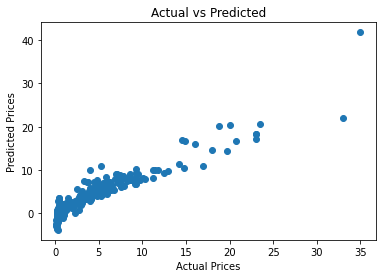

In [14]:
plt.scatter( y_train, x_training_prediction )
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()

In [15]:
x_test_prediction = lr_model.predict(x_test)


error_score = metrics.r2_score(y_test, x_test_prediction)
print("R Squared Error : ", error_score)

R Squared Error :  0.8365766715026374


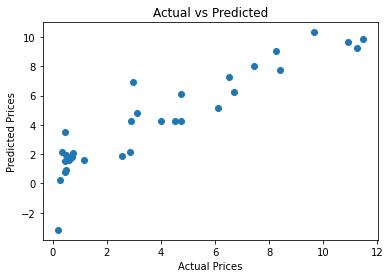

In [16]:
plt.scatter( y_test, x_test_prediction )
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()

# Model Training ( Lasso Regression )

R Squared Error :  0.8427856123435794


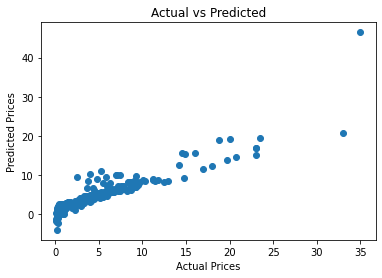

R Squared Error :  0.8709167941173195


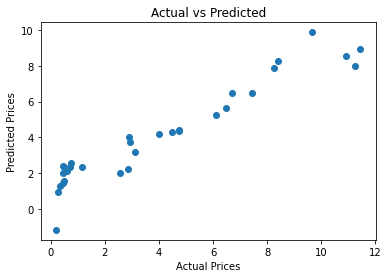

In [17]:
lass_model = Lasso()

lass_model.fit(x_train, y_train)

# Evaluating Model

x_training_prediction = lass_model.predict(x_train)


error_score = metrics.r2_score(y_train, x_training_prediction)
print("R Squared Error : ", error_score)

## Visualizing the actual prices and predicted prices

plt.scatter( y_train, x_training_prediction )
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()

x_test_prediction = lass_model.predict(x_test)


error_score = metrics.r2_score(y_test, x_test_prediction)
print("R Squared Error : ", error_score)

plt.scatter( y_test, x_test_prediction )
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()